# Data Exploration and Feature Engineering

In [28]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
#os.chdir("../Data/edited/")

In [6]:
aemo_wu_df = pd.read_csv("aemo_wu_merged.csv", index_col=0)

In [7]:
aemo_wu_df.head()

,timestamp,Operational Demand (MW),temperature(celcius),dew_point(celcius),humidity(%),Wind,wind_speed(mph),wind_gush(mph),pressure(in),precip.(in),Condition
0,2017-01-22 00:00:00,1815.214,20.0,15.0,73.0,SSW,9.0,0.0,29.0,0.0,Fair
1,2017-01-22 00:30:00,1777.040,20.0,15.0,73.0,SSW,10.0,0.0,29.0,0.0,Fair
2,2017-01-22 01:00:00,1745.448,18.9,15.0,78.0,SSW,9.0,0.0,29.0,0.0,Fair
3,2017-01-22 01:30:00,1729.164,18.9,15.0,78.0,SSW,15.0,0.0,29.0,0.0,Fair
4,2017-01-22 02:00:00,1714.276,18.9,12.8,68.0,SSW,18.0,0.0,29.0,0.0,Fair


In [8]:
aemo_wu_df.describe()

,Operational Demand (MW),temperature(celcius),dew_point(celcius),humidity(%),wind_speed(mph),wind_gush(mph),pressure(in),precip.(in)
count,97504.000000,97504.000000,97504.000000,97504.000000,97504.000000,97504.000000,97504.000000,97504.0
mean,2024.033428,19.192862,10.358651,61.199264,11.037301,0.911634,29.332540,0.0
std,403.227198,6.504368,4.280321,21.330864,5.149548,5.521146,0.471126,0.0
min,761.204000,1.100000,-15.000000,5.000000,0.000000,0.000000,29.000000,0.0
25%,1739.725500,13.900000,7.200000,47.000000,7.000000,0.000000,29.000000,0.0
50%,1949.919000,18.900000,10.000000,58.000000,10.000000,0.000000,29.000000,0.0
75%,2260.464000,23.900000,13.900000,77.000000,14.000000,0.000000,30.000000,0.0
max,3979.836000,42.800000,22.800000,100.000000,37.000000,58.000000,30.000000,0.0


In [9]:
numerical = ['Operational Demand (MW)','temperature(celcius)','dew_point(celcius)', 'humidity(%)', 'wind_speed(mph)','wind_gush(mph)', 'pressure(in)', 'precip.(in)' ]
categorical = ['Wind', 'Condition']

<AxesSubplot:>

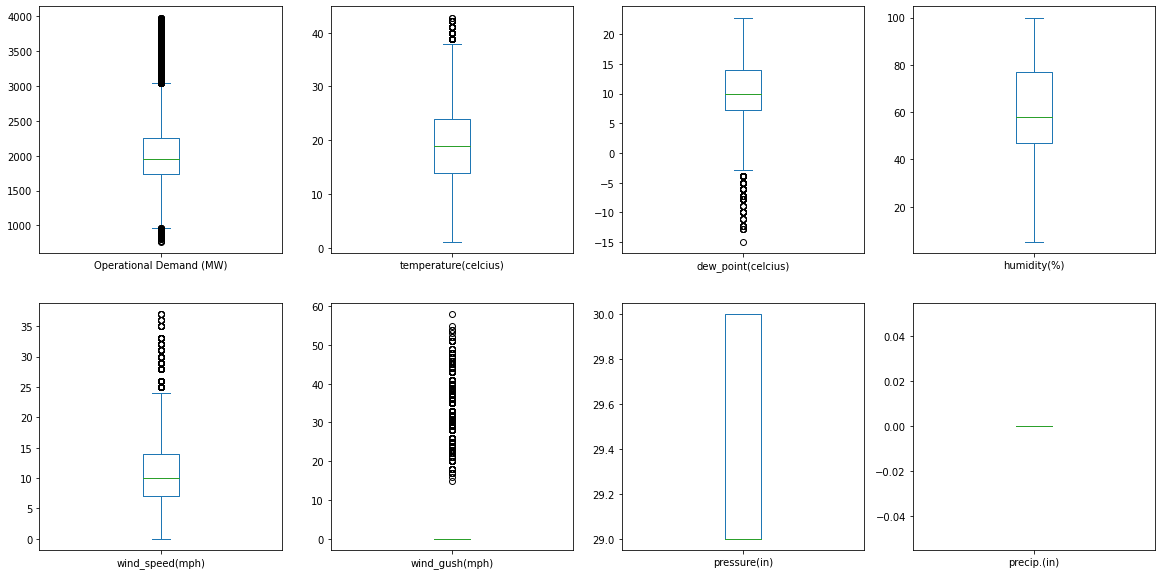

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=4,figsize=(20, 10))
aemo_wu_df['Operational Demand (MW)'].plot.box(ax=axes[0,0])
aemo_wu_df['temperature(celcius)'].plot.box(ax=axes[0,1])
aemo_wu_df['dew_point(celcius)'].plot.box(ax=axes[0,2])
aemo_wu_df['humidity(%)'].plot.box(ax=axes[0,3])
aemo_wu_df['wind_speed(mph)'].plot.box(ax=axes[1,0])
aemo_wu_df['wind_gush(mph)'].plot.box(ax=axes[1,1])
aemo_wu_df['pressure(in)'].plot.box(ax=axes[1,2])
aemo_wu_df['precip.(in)'].plot.box(ax=axes[1,3])

Wind gush is almost 0 and percipation is completely 0. So removing the columns.

In [11]:
aemo_wu_df = aemo_wu_df.drop(['wind_gush(mph)','precip.(in)'], axis = 1)
numerical.remove('wind_gush(mph)')
numerical.remove('precip.(in)')

In [12]:
aemo_wu_df.describe()

,Operational Demand (MW),temperature(celcius),dew_point(celcius),humidity(%),wind_speed(mph),pressure(in)
count,97504.000000,97504.000000,97504.000000,97504.000000,97504.000000,97504.000000
mean,2024.033428,19.192862,10.358651,61.199264,11.037301,29.332540
std,403.227198,6.504368,4.280321,21.330864,5.149548,0.471126
min,761.204000,1.100000,-15.000000,5.000000,0.000000,29.000000
25%,1739.725500,13.900000,7.200000,47.000000,7.000000,29.000000
50%,1949.919000,18.900000,10.000000,58.000000,10.000000,29.000000
75%,2260.464000,23.900000,13.900000,77.000000,14.000000,30.000000
max,3979.836000,42.800000,22.800000,100.000000,37.000000,30.000000


<AxesSubplot:xlabel='pressure(in)', ylabel='Operational Demand (MW)'>

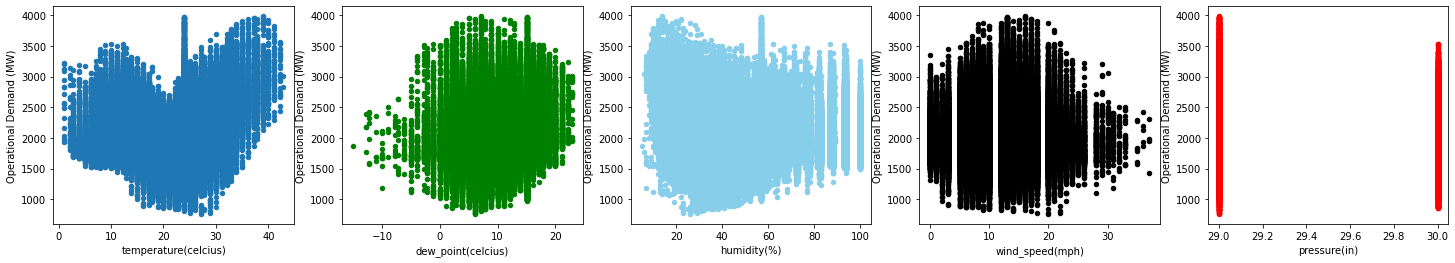

In [13]:
#pd.plotting.scatter_matrix(aemo_wu_df[['Operational Demand (MW)', 'temperature(celcius)']], figsize=(20, 10))

fig, axes = plt.subplots(nrows=1, ncols=5,figsize=(25, 4))
aemo_wu_df.plot.scatter(y = 'Operational Demand (MW)', x = 'temperature(celcius)', ax=axes[0,])
aemo_wu_df.plot.scatter(y = 'Operational Demand (MW)', x = 'dew_point(celcius)', ax=axes[1,], color = "green")
aemo_wu_df.plot.scatter(y = 'Operational Demand (MW)', x = 'humidity(%)', ax=axes[2,], color = "skyblue")
aemo_wu_df.plot.scatter(y = 'Operational Demand (MW)', x = 'wind_speed(mph)', ax=axes[3,], color = "black")
aemo_wu_df.plot.scatter(y = 'Operational Demand (MW)', x = 'pressure(in)', ax=axes[4,], color = "red")


In [14]:
aemo_wu_df.corr()

,Operational Demand (MW),temperature(celcius),dew_point(celcius),humidity(%),wind_speed(mph),pressure(in)
Operational Demand (MW),1.000000,0.196843,0.121277,-0.067923,0.044680,-0.095511
temperature(celcius),0.196843,1.000000,0.307910,-0.771656,0.397263,-0.468408
dew_point(celcius),0.121277,0.307910,1.000000,0.304610,0.035015,-0.446545
humidity(%),-0.067923,-0.771656,0.304610,1.000000,-0.439327,0.163130
wind_speed(mph),0.044680,0.397263,0.035015,-0.439327,1.000000,-0.293212
pressure(in),-0.095511,-0.468408,-0.446545,0.163130,-0.293212,1.000000


In [15]:
print("The correlation between Operational demand versus other 5 variables\n")

print("Operational Demand vs temperature\t: ", aemo_wu_df['Operational Demand (MW)'].corr(aemo_wu_df['temperature(celcius)']))
print("Operational Demand vs dew_point\t\t: ", aemo_wu_df['Operational Demand (MW)'].corr(aemo_wu_df['dew_point(celcius)']))
print("Operational Demand vs humidity\t\t: ",  aemo_wu_df['Operational Demand (MW)'].corr(aemo_wu_df['humidity(%)']))
print("Operational Demand vs wind_speed\t: ", aemo_wu_df['Operational Demand (MW)'].corr(aemo_wu_df['wind_speed(mph)']))
print("Operational Demand vs pressure\t\t: ", aemo_wu_df['Operational Demand (MW)'].corr(aemo_wu_df['pressure(in)']))

The correlation between Operational demand versus other 5 variables

Operational Demand vs temperature	:  0.19684272195780697
Operational Demand vs dew_point		:  0.12127721951352591
Operational Demand vs humidity		:  -0.0679225414095052
Operational Demand vs wind_speed	:  0.04467995981361224
Operational Demand vs pressure		:  -0.09551106630966141


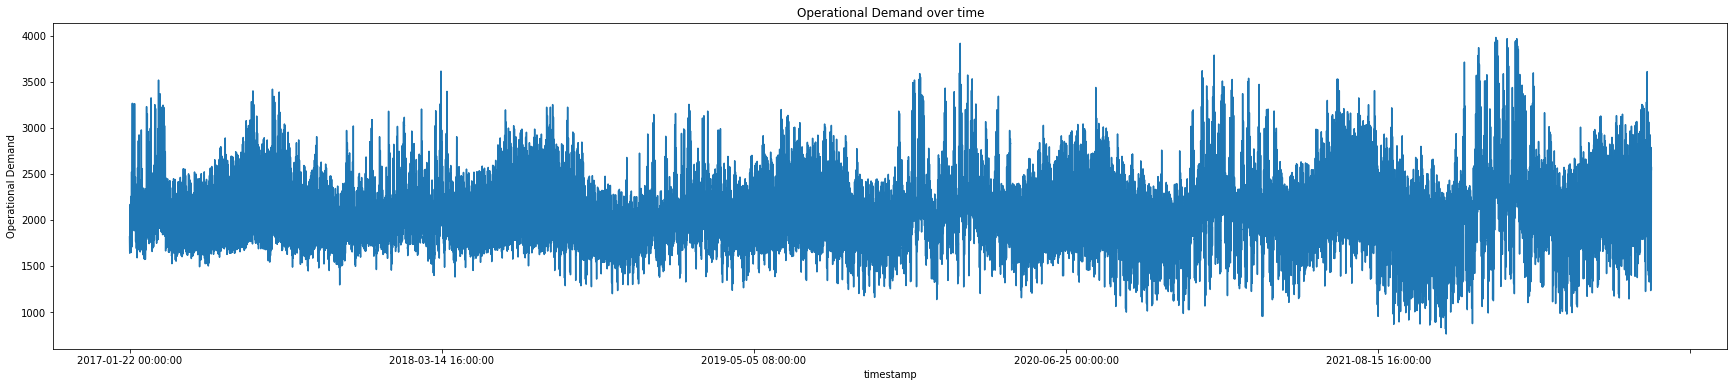

In [16]:
aemo_wu_df.plot(x = "timestamp", y = 'Operational Demand (MW)', figsize=(30, 6), legend = False)
plt.title("Operational Demand over time")
plt.ylabel("Operational Demand")
plt.show()

<AxesSubplot:xlabel='timestamp'>

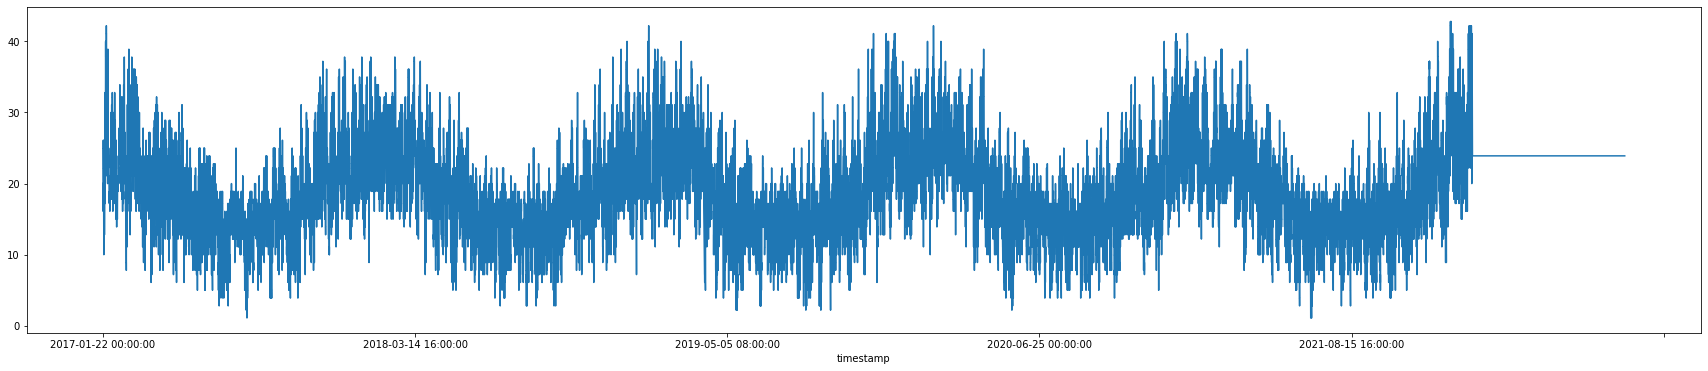

In [17]:
aemo_wu_df.plot(x = "timestamp", y = 'temperature(celcius)', figsize=(30, 6), legend = False)

<AxesSubplot:xlabel='timestamp'>

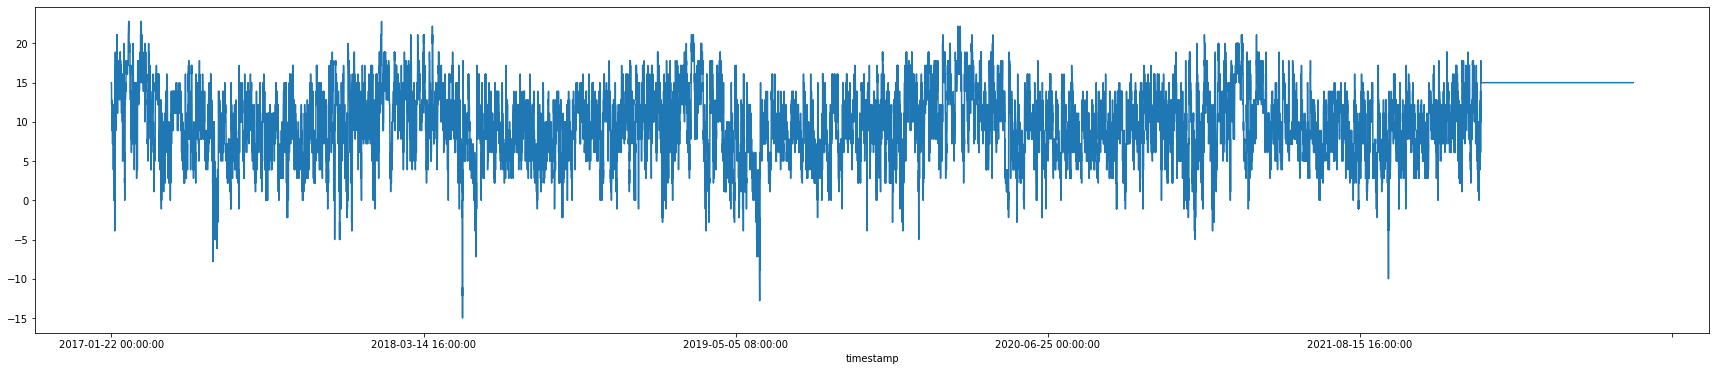

In [18]:
aemo_wu_df.plot(x = "timestamp", y = 'dew_point(celcius)', figsize=(30, 6), legend = False)

In [19]:
aemo_wu_df['year'] = pd.DatetimeIndex(aemo_wu_df['timestamp']).year

In [20]:
aemo_wu_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97504 entries, 0 to 97503
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                97504 non-null  object 
 1   Operational Demand (MW)  97504 non-null  float64
 2   temperature(celcius)     97504 non-null  float64
 3   dew_point(celcius)       97504 non-null  float64
 4   humidity(%)              97504 non-null  float64
 5   Wind                     97504 non-null  object 
 6   wind_speed(mph)          97504 non-null  float64
 7   pressure(in)             97504 non-null  float64
 8   Condition                97504 non-null  object 
 9   year                     97504 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 8.2+ MB


In [21]:
test_year = random.randint(2017,2022)

training_data = aemo_wu_df[aemo_wu_df['year'] != test_year]
testing_data = aemo_wu_df[aemo_wu_df['year'] == test_year]

X_train = training_data.drop('Operational Demand (MW)', axis = 1)
y_train = training_data['Operational Demand (MW)']

X_test = testing_data.drop('Operational Demand (MW)', axis = 1) 
y_test = testing_data['Operational Demand (MW)']

In [22]:
scaler = StandardScaler()

numerical.remove('Operational Demand (MW)')

scaler.fit(X_train[numerical])
X_train_scaled = scaler.transform(X_train[numerical])

scaler.fit(X_test[numerical])
X_test_scaled = scaler.transform(X_test[numerical])

## Changed code below

In [35]:
xgb_reg = XGBRegressor(objective='reg:squarederror',booster='gbtree',random_state=0)

param_grid_xgb = dict(
    max_depth =[4,5,6,7], 
    learning_rate = [0.001,0.01,0.1,1],
    n_estimators = [100,200,300])

grid=GridSearchCV(xgb_reg, param_grid_xgb, cv=3, scoring='neg_mean_squared_error',return_train_score=True)

grid.fit(X_train_scaled, y_train)

y_pred = grid.predict(X_test_scaled)

grid.best_score_
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}

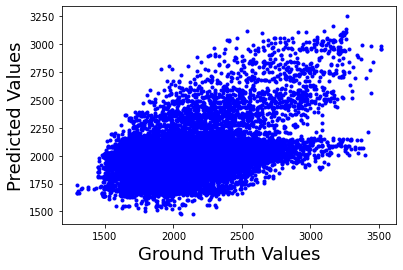

In [36]:
plt.plot(y_test, y_pred, "b.")
plt.xlabel("Ground Truth Values", rotation=0, fontsize=18)
plt.ylabel("Predicted Values" , rotation=90, fontsize=18)
plt.show()

In [42]:
importance = grid.best_estimator_.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print(' %s \t, Score: %.5f' % (numerical[i],v))

 temperature(celcius) 	, Score: 0.49910
 dew_point(celcius) 	, Score: 0.15749
 humidity(%) 	, Score: 0.15386
 wind_speed(mph) 	, Score: 0.05046
 pressure(in) 	, Score: 0.13909


In [43]:
mse = mean_squared_error(y_test, y_pred)
rmse_svm = np.sqrt(mse)
rmse_svm

319.37956766811305